<a href="https://colab.research.google.com/github/albakkartaufik/Comparison-of-Several-Models-and-Feature-Selection-Method-on-SOC-Content/blob/main/Feature_Selection_on_Soil_Parent_Material_A_Comprehensive_Analysis_to_Unravel_Complex_Relationship_to_SOC_Content.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Package

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold,train_test_split
from sklearn.metrics import r2_score, mean_squared_error as MSE
from sklearn.preprocessing import PowerTransformer, StandardScaler
from sklearn.feature_selection import mutual_info_regression, RFE, SelectKBest
from sklearn.ensemble import RandomForestRegressor
from matplotlib.patches import Patch

# Raw Data Section

## Import Raw Data

In [ ]:
data=pd.read_excel('/content/Datfix.xlsx')

In [ ]:
data.head()

,C_org,Elevation,SLOPE,ASPECT,CTI,TPI,VDEPTH,TRI,LSFactor,LAI,...,NBR,FOX,FRI,FRO,GOS,LAT,LST,CH,POINT_X,POINT_Y
0,8.95,1402.089966,33.410599,169.268997,-6.98016,14.51550,18.948900,2.143180,0.000230,1.48887,...,0.566054,0.575013,0.546828,2.10582,5.95028,2.07514,17.269138,3052.020020,107.646946,-6.778262
1,1.66,1158.979981,25.931400,314.806000,-7.58731,26.73270,7.126710,1.584220,0.000803,1.56439,...,0.600354,0.539227,0.514205,2.19447,5.39226,2.15929,19.581701,2598.580078,107.648265,-6.847805
2,1.61,1334.140015,23.140100,99.407898,-7.96873,4.64355,24.806200,1.163470,0.001973,1.42254,...,0.542497,0.574257,0.854286,1.46717,4.46154,1.93614,20.113136,2774.060059,107.607743,-6.798965
3,2.83,1352.099976,21.738899,138.951996,-6.80342,4.65967,23.527300,1.081250,0.000226,1.01381,...,0.369622,0.672975,0.788571,1.72837,2.14734,1.46217,20.692719,2785.290039,107.602226,-6.796746
4,4.11,1436.900024,8.079260,95.669800,-6.46925,11.87540,21.483299,0.595171,0.001125,1.39344,...,0.545455,0.618382,0.681818,1.76078,6.22963,2.10250,18.400653,2834.620117,107.606235,-6.792261


In [ ]:
# Delete Coordinate Columns
data = data.drop(columns=['POINT_X','POINT_Y'])

In [ ]:
data.head()

,C_org,Elevation,SLOPE,ASPECT,CTI,TPI,VDEPTH,TRI,LSFactor,LAI,...,NISI,NDTI,NBR,FOX,FRI,FRO,GOS,LAT,LST,CH
0,8.95,1402.089966,33.410599,169.268997,-6.98016,14.51550,18.948900,2.143180,0.000230,1.48887,...,-0.449690,0.349624,0.566054,0.575013,0.546828,2.10582,5.95028,2.07514,17.269138,3052.020020
1,1.66,1158.979981,25.931400,314.806000,-7.58731,26.73270,7.126710,1.584220,0.000803,1.56439,...,-0.416275,0.366947,0.600354,0.539227,0.514205,2.19447,5.39226,2.15929,19.581701,2598.580078
2,1.61,1334.140015,23.140100,99.407898,-7.96873,4.64355,24.806200,1.163470,0.001973,1.42254,...,-0.443305,0.318833,0.542497,0.574257,0.854286,1.46717,4.46154,1.93614,20.113136,2774.060059
3,2.83,1352.099976,21.738899,138.951996,-6.80342,4.65967,23.527300,1.081250,0.000226,1.01381,...,-0.010518,0.187709,0.369622,0.672975,0.788571,1.72837,2.14734,1.46217,20.692719,2785.290039
4,4.11,1436.900024,8.079260,95.669800,-6.46925,11.87540,21.483299,0.595171,0.001125,1.39344,...,-0.497797,0.355359,0.545455,0.618382,0.681818,1.76078,6.22963,2.10250,18.400653,2834.620117


## Data Cleaning

In [ ]:
# Missing Value and NAN  Detection
data.isna().sum()

,0
C_org,0
Elevation,0
SLOPE,0
ASPECT,0
CTI,0
TPI,0
VDEPTH,0
TRI,0
LSFactor,0
LAI,0


In [ ]:
# Duplicated Data Detection
data.duplicated().sum()

0

In [ ]:
# Outlier Detection
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(data))
z

,C_org,Elevation,SLOPE,ASPECT,CTI,TPI,VDEPTH,TRI,LSFactor,LAI,...,NISI,NDTI,NBR,FOX,FRI,FRO,GOS,LAT,LST,CH
0,2.117585,0.683498,0.448805,0.099854,0.674415,1.646163,0.616123,0.451955,0.819694,0.200779,...,0.559174,0.555224,0.347706,0.189686,0.754755,0.727764,0.720961,0.506871,1.009027,1.017068
1,0.935186,0.105453,0.059907,1.875998,1.107881,3.165519,0.695803,0.005366,0.523493,0.362101,...,0.448053,0.713381,0.509609,0.353191,0.918920,1.073213,0.455498,0.717847,0.145255,0.537357
2,0.956124,0.462983,0.085233,1.048309,1.380191,0.418467,0.576645,0.330799,0.080685,0.059087,...,0.537941,0.274104,0.236512,0.193140,0.792428,1.760907,0.012733,0.158378,0.053243,0.064201
3,0.445235,0.521268,0.158092,0.511447,0.548234,0.420472,0.585265,0.396490,0.821966,0.814023,...,0.901287,0.923047,0.579493,0.257897,0.461739,0.743071,1.088186,1.029932,0.269725,0.102698
4,0.090779,0.796465,0.868357,1.099058,0.309658,1.317835,0.599041,0.784850,0.357289,0.003075,...,0.719154,0.607584,0.250474,0.008464,0.075461,0.616777,0.853855,0.575466,0.586391,0.271805
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,0.667179,0.201934,0.161895,2.108981,0.699417,2.285766,0.189580,0.378371,0.184320,0.091212,...,0.422227,0.785088,0.286065,0.074993,0.957919,1.337687,0.714763,0.817355,0.627579,0.246403
142,0.249909,0.081179,1.203776,0.766885,0.618607,0.426604,0.461926,0.945229,0.523957,0.651187,...,1.002206,0.930828,0.630927,0.418307,0.819821,0.716736,1.831980,1.027504,0.113723,0.217230
143,0.078217,0.096659,1.117548,0.778696,0.771303,0.285195,0.435809,1.079415,0.375182,0.931322,...,0.688370,0.849152,0.779293,0.706439,0.773611,0.502415,0.497605,0.908390,0.244961,0.235981
144,0.152102,0.110289,1.048527,0.795137,0.698103,0.783739,0.255231,1.221159,0.152786,0.628757,...,0.719090,0.721050,0.607850,0.506995,0.798646,0.674107,0.673156,0.728377,0.024253,0.505771


In [ ]:
# Indicated Outliers
threshold = 3
print('z score more than 3')
print(np.where(z > 3))
print('z score less than 3')
print(np.where(z < -3))

z score more than 3
(array([  1,   5,  10,  15,  49,  52,  52,  54,  64,  84,  84,  99, 102,
       108, 116, 126]), array([ 5,  8,  5, 22,  7,  2,  7,  5,  4,  4,  8,  5, 22,  4, 23,  4]))
z score less than 3
(array([], dtype=int64), array([], dtype=int64))


In [ ]:
#Outlier Deletion
data_clean= data[(z < 3).all(axis=1)]

In [ ]:
data.shape

(146, 29)

In [ ]:
data_clean.shape

(132, 29)



---


outlier = (data.shape) - (data_clean.shape)

outlier detected = 14


---




# Normalize Data (For Linear Regression Problem)

In [ ]:
#checking with smirnof-kolmogorov
features=['C_org', 'Elevation', 'SLOPE', 'ASPECT', 'CTI', 'TPI', 'VDEPTH', 'TRI',
       'LSFactor', 'LAI', 'NDVI', 'CARI', 'NDBI', 'BSI', 'CFaktor', 'SCRI',
       'SMI', 'SBR', 'CI', 'NISI', 'NDTI', 'NBR', 'FOX', 'FRI', 'FRO', 'GOS',
       'LAT', 'LST', 'CH']
for a in features:
  z_score = stats.zscore(data_clean[a])
  normality = stats.kstest(z_score, 'norm',)
  print('normality for ', a, '=', normality)

normality for  C_org = KstestResult(statistic=0.12679215729270127, pvalue=0.02614882944482185, statistic_location=-0.5537513624696417, statistic_sign=1)
normality for  Elevation = KstestResult(statistic=0.12154452125361076, pvalue=0.03708400316349991, statistic_location=-0.13248056548429304, statistic_sign=-1)
normality for  SLOPE = KstestResult(statistic=0.10868424919324038, pvalue=0.0820055500820224, statistic_location=-0.27589137117363705, statistic_sign=1)
normality for  ASPECT = KstestResult(statistic=0.07039807148794441, pvalue=0.5074002616171185, statistic_location=0.10859539211039435, statistic_sign=1)
normality for  CTI = KstestResult(statistic=0.1035113137558834, pvalue=0.1100498678111568, statistic_location=0.39631710204862514, statistic_sign=1)
normality for  TPI = KstestResult(statistic=0.12673689731523624, pvalue=0.026247239863576095, statistic_location=-0.19629038643589453, statistic_sign=-1)
normality for  VDEPTH = KstestResult(statistic=0.34520889061450355, pvalue=1.48



---


*) significant at p-value>0.05

---



In [ ]:
nonnormal_pos = data_clean[['Elevation','VDEPTH','NDVI','CFaktor','SCRI','SMI','FOX','FRI','LAT','CH']]
nonnormal_neg = data_clean[['TPI','NDBI','BSI','NISI','NDTI','NBR']]
normal = data_clean[['SLOPE','ASPECT','CTI','TRI','LSFactor','LAI','CARI','SBR','CI','FRO','GOS','LST']]

### Non-Normal Positive

In [ ]:
pt = PowerTransformer(method='box-cox') #box-cox for all positive value
pt.fit(nonnormal_pos)
normal_pos = pt.transform(nonnormal_pos)
normal_pos = pd.DataFrame(normal_pos,columns=['Elevation','VDEPTH','NDVI',
                                              'CFaktor','SCRI','SMI','FOX','FRI','LAT','CH'])
normal_pos.head()

,Elevation,VDEPTH,NDVI,CFaktor,SCRI,SMI,FOX,FRI,LAT,CH
0,0.644359,-0.675841,0.788435,-0.741693,0.445906,1.623463,0.014664,-0.726544,0.445906,1.025372
1,0.385337,-0.482628,0.622177,-0.455889,0.058271,1.378444,0.010506,0.977195,0.058271,-0.062620
2,0.452842,-0.520758,-1.163524,1.134497,-1.076415,-0.983708,0.503896,0.720465,-1.076415,-0.022643
3,0.780848,-0.586045,0.797143,-0.758192,0.525111,1.941700,0.242744,0.202857,0.525111,0.156831
4,0.094425,-1.143711,0.732591,-0.639785,0.047078,0.098609,-0.414575,-0.444349,0.047078,0.615914


In [ ]:
#checking with smirnof-kolmogorov
features=['Elevation','VDEPTH','NDVI',
          'CFaktor','SCRI','SMI','FOX','FRI','LAT','CH']
for a in features:
  z_score = stats.zscore(normal_pos[a])
  normality = stats.kstest(z_score, 'norm',)
  print('normality for ', a, '=', normality)

normality for  Elevation = KstestResult(statistic=0.11091788014066728, pvalue=0.07190375385207835, statistic_location=-1.527450254181455, statistic_sign=1)
normality for  VDEPTH = KstestResult(statistic=0.11854693669185568, pvalue=0.0449751802365334, statistic_location=0.48027302485249346, statistic_sign=1)
normality for  NDVI = KstestResult(statistic=0.20093414260046683, pvalue=3.7896241769758155e-05, statistic_location=0.5053924367489208, statistic_sign=-1)
normality for  CFaktor = KstestResult(statistic=0.12071294084562872, pvalue=0.03914179292631882, statistic_location=-0.6260206588516561, statistic_sign=1)
normality for  SCRI = KstestResult(statistic=0.1169134914337403, pvalue=0.049859339619357027, statistic_location=0.5251105385518277, statistic_sign=-1)
normality for  SMI = KstestResult(statistic=0.08670027301361194, pvalue=0.2589063618247779, statistic_location=-0.614748740307666, statistic_sign=1)
normality for  FOX = KstestResult(statistic=0.07594968095247806, pvalue=0.411256

In [ ]:
normal_1 = normal_pos[['Elevation','SMI','FOX']]
nonnormal_pos = normal_pos[['VDEPTH','NDVI','CFaktor','SCRI','FRI','LAT','CH']]
normal = normal.reset_index(drop=True)
normal_1 = normal_1.reset_index(drop=True)
normal_d = normal.join(normal_1)
normal_d.shape

(132, 15)

In [ ]:
pt = PowerTransformer(method='yeo-johnson') #box-cox for all positive value
pt.fit(nonnormal_pos)
normal_pos = pt.transform(nonnormal_pos)
normal_pos = pd.DataFrame(normal_pos,columns=['VDEPTH','NDVI','CFaktor','SCRI',
                                              'FRI','LAT','CH'])
normal_pos.head()

,VDEPTH,NDVI,CFaktor,SCRI,FRI,LAT,CH
0,-0.672283,0.791798,-0.715713,0.396477,-0.709977,0.396477,1.040576
1,-0.477031,0.520721,-0.397717,-0.009134,0.979888,-0.009134,-0.136303
2,-0.515520,-1.185783,1.120513,-1.071199,0.741002,-1.071199,-0.096507
3,-0.581472,0.806578,-0.734439,0.482062,0.245288,0.482062,0.085969
4,-1.147135,0.698385,-0.600912,-0.020484,-0.411271,-0.020484,0.577494


In [ ]:
#checking with smirnof-kolmogorov
features=['VDEPTH','NDVI','CFaktor','SCRI','FRI','LAT','CH']
for a in features:
  z_score = stats.zscore(normal_pos[a])
  normality = stats.kstest(z_score, 'norm',)
  print('normality for ', a, '=', normality)

normality for  VDEPTH = KstestResult(statistic=0.11653436410663287, pvalue=0.05105632384410319, statistic_location=0.48594223524677843, statistic_sign=1)
normality for  NDVI = KstestResult(statistic=0.14180860423394825, pvalue=0.008863556479058638, statistic_location=0.3430852773329476, statistic_sign=-1)
normality for  CFaktor = KstestResult(statistic=0.10840776751401604, pvalue=0.08333532427288841, statistic_location=0.9173828798643346, statistic_sign=-1)
normality for  SCRI = KstestResult(statistic=0.10355523184046544, pvalue=0.10978204022225846, statistic_location=0.643095300678401, statistic_sign=-1)
normality for  FRI = KstestResult(statistic=0.114565688537136, pvalue=0.057677990014385894, statistic_location=-0.7015019228586509, statistic_sign=1)
normality for  LAT = KstestResult(statistic=0.10355523184046544, pvalue=0.10978204022225846, statistic_location=0.643095300678401, statistic_sign=-1)
normality for  CH = KstestResult(statistic=0.14535962862998647, pvalue=0.00674148526691

In [ ]:
normal_1 = normal_pos[['VDEPTH','CFaktor','SCRI','FRI','LAT']]
nonnormal_pos = normal_pos[['NDVI','CH']]
normal_d = normal_d.reset_index(drop=True)
normal_1 = normal_1.reset_index(drop=True)
normal_d = normal_d.join(normal_1)

In [ ]:
normal_d.shape

(132, 20)

In [ ]:
from sklearn.preprocessing import QuantileTransformer

# Apply quantile transformation
quantile_transformer = QuantileTransformer(output_distribution='normal')
normal_pos = quantile_transformer.fit_transform(nonnormal_pos)
normal_pos = pd.DataFrame(normal_pos, columns=['NDVI','CH'])
normal_pos.head()

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_data.py:2824: UserWarning: n_quantiles (1000) is greater than the total number of samples (132). n_quantiles is set to n_samples.
  warnings.warn(


,NDVI,CH
0,0.509093,0.793510
1,0.182791,-0.202284
2,-0.793510,-0.144005
3,0.530998,0.009567
4,0.402898,0.402898


In [ ]:
normal_pos.shape

(132, 2)

In [ ]:
#checking with smirnof-kolmogorov
features=[['NDVI','CH']]
for a in features:
  z_score = stats.zscore(normal_pos[a])
  normality = stats.kstest(z_score, 'norm',)
  print('normality for ', a, '=', normality)

normality for  ['NDVI', 'CH'] = KstestResult(statistic=array([0.0357472, 0.0357472]), pvalue=array([0.99380615, 0.99380615]), statistic_location=array([0.91656013, 0.91656013]), statistic_sign=array([1., 1.]))


In [ ]:
normal = normal_d.reset_index(drop=True)
normal_pos = normal_pos.reset_index(drop=True)
normal = normal_d.join(normal_pos)
normal.head()

,SLOPE,ASPECT,CTI,TRI,LSFactor,LAI,CARI,SBR,CI,FRO,...,Elevation,SMI,FOX,VDEPTH,CFaktor,SCRI,FRI,LAT,NDVI,CH
0,33.410599,169.268997,-6.98016,2.143180,0.000230,1.48887,1.073588,0.193955,0.540293,2.10582,...,0.644359,1.623463,0.014664,-0.672283,-0.715713,0.396477,-0.709977,0.396477,0.509093,0.793510
1,23.140100,99.407898,-7.96873,1.163470,0.001973,1.42254,0.622803,0.242976,0.371482,1.46717,...,0.385337,1.378444,0.010506,-0.477031,-0.397717,-0.009134,0.979888,-0.009134,0.182791,-0.202284
2,21.738899,138.951996,-6.80342,1.081250,0.000226,1.01381,0.571552,0.300105,0.575680,1.72837,...,0.452842,-0.983708,0.503896,-0.515520,1.120513,-1.071199,0.741002,-1.071199,-0.793510,-0.144005
3,8.079260,95.669800,-6.46925,0.595171,0.001125,1.39344,1.090671,0.146951,0.466667,1.76078,...,0.780848,1.941700,0.242744,-0.581472,-0.734439,0.482062,0.245288,0.482062,0.530998,0.009567
4,15.223300,300.082001,-7.50642,1.469140,0.001525,1.67749,1.572049,0.345694,0.681818,1.97841,...,0.094425,0.098609,-0.414575,-1.147135,-0.600912,-0.020484,-0.411271,-0.020484,0.402898,0.402898


In [ ]:
normal.shape

(132, 22)

In [ ]:
#checking with smirnof-kolmogorov
features=['Elevation','VDEPTH','NDVI','CFaktor','SCRI','SMI','FOX','FRI','LAT',
          'CH','SLOPE','ASPECT','CTI','TRI','LSFactor','LAI','CARI','SBR','CI',
          'FRO','GOS','LST']
for a in features:
  z_score = stats.zscore(normal[a])
  normality = stats.kstest(z_score, 'norm',)
  print('normality for ', a, '=', normality)

normality for  Elevation = KstestResult(statistic=0.11091788014066728, pvalue=0.07190375385207835, statistic_location=-1.527450254181455, statistic_sign=1)
normality for  VDEPTH = KstestResult(statistic=0.11653436410663287, pvalue=0.05105632384410319, statistic_location=0.48594223524677843, statistic_sign=1)
normality for  NDVI = KstestResult(statistic=0.03574719968757878, pvalue=0.9938061485264402, statistic_location=0.9165601254759363, statistic_sign=1)
normality for  CFaktor = KstestResult(statistic=0.10840776751401604, pvalue=0.08333532427288841, statistic_location=0.9173828798643346, statistic_sign=-1)
normality for  SCRI = KstestResult(statistic=0.10355523184046544, pvalue=0.10978204022225846, statistic_location=0.643095300678401, statistic_sign=-1)
normality for  SMI = KstestResult(statistic=0.08670027301361194, pvalue=0.2589063618247779, statistic_location=-0.614748740307666, statistic_sign=1)
normality for  FOX = KstestResult(statistic=0.07594968095247806, pvalue=0.41125649207

### Non-Normal Negative

In [ ]:
nonnormal_neg = data_clean[['TPI','NDBI','BSI','NISI','NDTI','NBR']]

In [ ]:
#checking with smirnof-kolmogorov
features=['TPI','NDBI','BSI','NISI','NDTI','NBR']
for a in features:
  z_score = stats.zscore(nonnormal_neg[a])
  normality = stats.kstest(z_score, 'norm',)
  print('normality for ', a, '=', normality)

normality for  TPI = KstestResult(statistic=0.12673689731523624, pvalue=0.026247239863576095, statistic_location=-0.19629038643589453, statistic_sign=-1)
normality for  NDBI = KstestResult(statistic=0.16317799229993268, pvalue=0.001539679219183002, statistic_location=-0.22091429458506273, statistic_sign=1)
normality for  BSI = KstestResult(statistic=0.1407505358854566, pvalue=0.009603898141494517, statistic_location=-0.3202194781865468, statistic_sign=1)
normality for  NISI = KstestResult(statistic=0.19479680364261864, pvalue=7.301539860622656e-05, statistic_location=-0.46670713676093906, statistic_sign=1)
normality for  NDTI = KstestResult(statistic=0.15482363982088843, pvalue=0.0031439327134927275, statistic_location=0.5471260824382171, statistic_sign=-1)
normality for  NBR = KstestResult(statistic=0.16317822113615238, pvalue=0.0015396483080559091, statistic_location=0.22091488236152584, statistic_sign=-1)


In [ ]:
pt = PowerTransformer(method='yeo-johnson') #box-cox for all positive value
pt.fit(nonnormal_neg)
normal_neg = pt.transform(nonnormal_neg)
normal_neg = pd.DataFrame(normal_neg,columns=['TPI','NDBI','BSI','NISI','NDTI','NBR'])
normal_neg.head()

,TPI,NDBI,BSI,NISI,NDTI,NBR
0,2.167453,-0.160022,-0.355626,-0.465289,0.472471,0.160023
1,0.490651,0.003595,-0.039146,-0.432753,0.089250,-0.003594
2,0.493275,0.933470,0.956077,1.105652,-1.088356,-0.933469
3,1.708298,-0.016406,-0.193496,-0.721107,0.549220,0.016407
4,0.566796,-0.313444,-0.453497,-0.682286,0.078006,0.313445


In [ ]:
#checking with smirnof-kolmogorov
features=['TPI','NDBI','BSI','NISI','NDTI','NBR']
for a in features:
  z_score = stats.zscore(normal_neg[a])
  normality = stats.kstest(z_score, 'norm',)
  print('normality for ', a, '=', normality)

normality for  TPI = KstestResult(statistic=0.09921800102251799, pvalue=0.1389492165832259, statistic_location=-0.36704223109471357, statistic_sign=-1)
normality for  NDBI = KstestResult(statistic=0.0869498381378303, pvalue=0.2559320827840045, statistic_location=-0.21970575321705338, statistic_sign=1)
normality for  BSI = KstestResult(statistic=0.11144030350255524, pvalue=0.06969961683724711, statistic_location=-0.5094273262026605, statistic_sign=1)
normality for  NISI = KstestResult(statistic=0.1522512606680585, pvalue=0.003886969166226552, statistic_location=-0.4327526877622349, statistic_sign=1)
normality for  NDTI = KstestResult(statistic=0.1252394502468357, pvalue=0.02904151873791971, statistic_location=0.549220069761221, statistic_sign=-1)
normality for  NBR = KstestResult(statistic=0.0869501752734313, pvalue=0.25592808190124594, statistic_location=0.21970661893500418, statistic_sign=-1)


In [ ]:
nonnormal_neg = normal_neg[['NISI','NDTI']]
normal_neg = normal_neg[['TPI','NDBI','BSI','NBR']]

normal = normal.reset_index(drop=True)
normal_neg = normal_neg.reset_index(drop=True)
normal = normal.join(normal_neg)
normal.head()

,SLOPE,ASPECT,CTI,TRI,LSFactor,LAI,CARI,SBR,CI,FRO,...,CFaktor,SCRI,FRI,LAT,NDVI,CH,TPI,NDBI,BSI,NBR
0,33.410599,169.268997,-6.98016,2.143180,0.000230,1.48887,1.073588,0.193955,0.540293,2.10582,...,-0.715713,0.396477,-0.709977,0.396477,0.509093,0.793510,2.167453,-0.160022,-0.355626,0.160023
1,23.140100,99.407898,-7.96873,1.163470,0.001973,1.42254,0.622803,0.242976,0.371482,1.46717,...,-0.397717,-0.009134,0.979888,-0.009134,0.182791,-0.202284,0.490651,0.003595,-0.039146,-0.003594
2,21.738899,138.951996,-6.80342,1.081250,0.000226,1.01381,0.571552,0.300105,0.575680,1.72837,...,1.120513,-1.071199,0.741002,-1.071199,-0.793510,-0.144005,0.493275,0.933470,0.956077,-0.933469
3,8.079260,95.669800,-6.46925,0.595171,0.001125,1.39344,1.090671,0.146951,0.466667,1.76078,...,-0.734439,0.482062,0.245288,0.482062,0.530998,0.009567,1.708298,-0.016406,-0.193496,0.016407
4,15.223300,300.082001,-7.50642,1.469140,0.001525,1.67749,1.572049,0.345694,0.681818,1.97841,...,-0.600912,-0.020484,-0.411271,-0.020484,0.402898,0.402898,0.566796,-0.313444,-0.453497,0.313445


In [ ]:
pt = PowerTransformer(method='yeo-johnson') #box-cox for all positive value
pt.fit(nonnormal_neg)
normal_neg = pt.transform(nonnormal_neg)
normal_neg = pd.DataFrame(normal_neg,columns=['NISI','NDTI'])
normal_neg.head()

,NISI,NDTI
0,-0.345240,0.410439
1,-0.305293,0.000357
2,1.109909,-1.082781
3,-0.674154,0.496026
4,-0.622592,-0.011199


In [ ]:
#checking with smirnof-kolmogorov
features=['NISI','NDTI']
for a in features:
  z_score = stats.zscore(normal_neg[a])
  normality = stats.kstest(z_score, 'norm',)
  print('normality for ', a, '=', normality)

normality for  NISI = KstestResult(statistic=0.13116166873179536, pvalue=0.019328222764697697, statistic_location=1.073311877115536, statistic_sign=-1)
normality for  NDTI = KstestResult(statistic=0.1077335435153236, pvalue=0.08665427017083308, statistic_location=0.6560287280229389, statistic_sign=-1)


In [ ]:
nonnormal_neg = normal_neg[['NISI']]
normal_neg = normal_neg[['NDTI']]

normal = normal.reset_index(drop=True)
normal_neg = normal_neg.reset_index(drop=True)
normal = normal.join(normal_neg)
normal.head()

,SLOPE,ASPECT,CTI,TRI,LSFactor,LAI,CARI,SBR,CI,FRO,...,SCRI,FRI,LAT,NDVI,CH,TPI,NDBI,BSI,NBR,NDTI
0,33.410599,169.268997,-6.98016,2.143180,0.000230,1.48887,1.073588,0.193955,0.540293,2.10582,...,0.396477,-0.709977,0.396477,0.509093,0.793510,2.167453,-0.160022,-0.355626,0.160023,0.410439
1,23.140100,99.407898,-7.96873,1.163470,0.001973,1.42254,0.622803,0.242976,0.371482,1.46717,...,-0.009134,0.979888,-0.009134,0.182791,-0.202284,0.490651,0.003595,-0.039146,-0.003594,0.000357
2,21.738899,138.951996,-6.80342,1.081250,0.000226,1.01381,0.571552,0.300105,0.575680,1.72837,...,-1.071199,0.741002,-1.071199,-0.793510,-0.144005,0.493275,0.933470,0.956077,-0.933469,-1.082781
3,8.079260,95.669800,-6.46925,0.595171,0.001125,1.39344,1.090671,0.146951,0.466667,1.76078,...,0.482062,0.245288,0.482062,0.530998,0.009567,1.708298,-0.016406,-0.193496,0.016407,0.496026
4,15.223300,300.082001,-7.50642,1.469140,0.001525,1.67749,1.572049,0.345694,0.681818,1.97841,...,-0.020484,-0.411271,-0.020484,0.402898,0.402898,0.566796,-0.313444,-0.453497,0.313445,-0.011199


In [ ]:
quantile_transformer = QuantileTransformer(output_distribution='normal')
normal_neg = quantile_transformer.fit_transform(nonnormal_neg)
normal_neg = pd.DataFrame(normal_neg, columns=['NISI'])
normal_neg.head()

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_data.py:2824: UserWarning: n_quantiles (1000) is greater than the total number of samples (132). n_quantiles is set to n_samples.
  warnings.warn(


,NISI
0,-0.105435
1,-0.047855
2,0.717149
3,-0.402898
4,-0.361725


In [ ]:
#checking with smirnof-kolmogorov
features=['NISI']
for a in features:
  z_score = stats.zscore(normal_neg[a])
  normality = stats.kstest(z_score, 'norm',)
  print('normality for ', a, '=', normality)

normality for  NISI = KstestResult(statistic=0.03574719968757878, pvalue=0.9938061485264402, statistic_location=0.9165601254759363, statistic_sign=1)


In [ ]:
normal = normal.reset_index(drop=True)
normal_neg = normal_neg.reset_index(drop=True)
normal = normal.join(normal_neg)
normal.head()

,SLOPE,ASPECT,CTI,TRI,LSFactor,LAI,CARI,SBR,CI,FRO,...,FRI,LAT,NDVI,CH,TPI,NDBI,BSI,NBR,NDTI,NISI
0,33.410599,169.268997,-6.98016,2.143180,0.000230,1.48887,1.073588,0.193955,0.540293,2.10582,...,-0.709977,0.396477,0.509093,0.793510,2.167453,-0.160022,-0.355626,0.160023,0.410439,-0.105435
1,23.140100,99.407898,-7.96873,1.163470,0.001973,1.42254,0.622803,0.242976,0.371482,1.46717,...,0.979888,-0.009134,0.182791,-0.202284,0.490651,0.003595,-0.039146,-0.003594,0.000357,-0.047855
2,21.738899,138.951996,-6.80342,1.081250,0.000226,1.01381,0.571552,0.300105,0.575680,1.72837,...,0.741002,-1.071199,-0.793510,-0.144005,0.493275,0.933470,0.956077,-0.933469,-1.082781,0.717149
3,8.079260,95.669800,-6.46925,0.595171,0.001125,1.39344,1.090671,0.146951,0.466667,1.76078,...,0.245288,0.482062,0.530998,0.009567,1.708298,-0.016406,-0.193496,0.016407,0.496026,-0.402898
4,15.223300,300.082001,-7.50642,1.469140,0.001525,1.67749,1.572049,0.345694,0.681818,1.97841,...,-0.411271,-0.020484,0.402898,0.402898,0.566796,-0.313444,-0.453497,0.313445,-0.011199,-0.361725


In [ ]:
c_org = data_clean[['C_org']]
c_org = c_org.reset_index(drop=True)
normal = normal.reset_index(drop=True)
data_norm = c_org.join(normal)

In [ ]:
data_norm.head()

,C_org,SLOPE,ASPECT,CTI,TRI,LSFactor,LAI,CARI,SBR,CI,...,FRI,LAT,NDVI,CH,TPI,NDBI,BSI,NBR,NDTI,NISI
0,8.95,33.410599,169.268997,-6.98016,2.143180,0.000230,1.48887,1.073588,0.193955,0.540293,...,-0.709977,0.396477,0.509093,0.793510,2.167453,-0.160022,-0.355626,0.160023,0.410439,-0.105435
1,1.61,23.140100,99.407898,-7.96873,1.163470,0.001973,1.42254,0.622803,0.242976,0.371482,...,0.979888,-0.009134,0.182791,-0.202284,0.490651,0.003595,-0.039146,-0.003594,0.000357,-0.047855
2,2.83,21.738899,138.951996,-6.80342,1.081250,0.000226,1.01381,0.571552,0.300105,0.575680,...,0.741002,-1.071199,-0.793510,-0.144005,0.493275,0.933470,0.956077,-0.933469,-1.082781,0.717149
3,4.11,8.079260,95.669800,-6.46925,0.595171,0.001125,1.39344,1.090671,0.146951,0.466667,...,0.245288,0.482062,0.530998,0.009567,1.708298,-0.016406,-0.193496,0.016407,0.496026,-0.402898
4,5.35,15.223300,300.082001,-7.50642,1.469140,0.001525,1.67749,1.572049,0.345694,0.681818,...,-0.411271,-0.020484,0.402898,0.402898,0.566796,-0.313444,-0.453497,0.313445,-0.011199,-0.361725


In [ ]:
#checking with smirnof-kolmogorov
features=['C_org', 'Elevation', 'SLOPE', 'ASPECT', 'CTI', 'TPI', 'VDEPTH', 'TRI',
       'LSFactor', 'LAI', 'NDVI', 'CARI', 'NDBI', 'BSI', 'CFaktor', 'SCRI',
       'SMI', 'SBR', 'CI', 'NISI', 'NDTI', 'NBR', 'FOX', 'FRI', 'FRO', 'GOS',
       'LAT', 'LST', 'CH']
for a in features:
  z_score = stats.zscore(data_norm[a])
  normality = stats.kstest(z_score, 'norm',)
  print('normality for ', a, '=', normality)

normality for  C_org = KstestResult(statistic=0.12679215729270127, pvalue=0.02614882944482185, statistic_location=-0.5537513624696417, statistic_sign=1)
normality for  Elevation = KstestResult(statistic=0.11091788014066728, pvalue=0.07190375385207835, statistic_location=-1.527450254181455, statistic_sign=1)
normality for  SLOPE = KstestResult(statistic=0.10868424919324038, pvalue=0.0820055500820224, statistic_location=-0.27589137117363705, statistic_sign=1)
normality for  ASPECT = KstestResult(statistic=0.07039807148794441, pvalue=0.5074002616171185, statistic_location=0.10859539211039435, statistic_sign=1)
normality for  CTI = KstestResult(statistic=0.1035113137558834, pvalue=0.1100498678111568, statistic_location=0.39631710204862514, statistic_sign=1)
normality for  TPI = KstestResult(statistic=0.09921800102251799, pvalue=0.1389492165832259, statistic_location=-0.36704223109471357, statistic_sign=-1)
normality for  VDEPTH = KstestResult(statistic=0.11653436410663287, pvalue=0.0510563

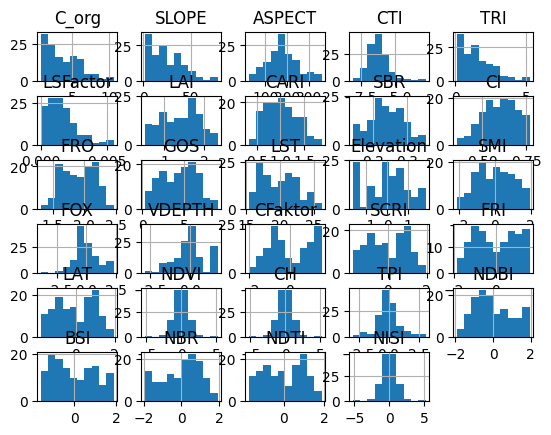

In [ ]:
data_norm.hist()
plt.show()

In [ ]:
data_norm = pd.read_excel('data_norm.xlsx')
data_norm.head()

FileNotFoundError: [Errno 2] No such file or directory: 'data_norm.xlsx'

# Scaling Data (For Model Coeff)

In [ ]:
scaler = StandardScaler()

#### Soil (s)

In [ ]:
soil_scaling = data_norm[['SBR','CI','SMI','NISI','SCRI','NDTI','NBR']]

In [ ]:
soil_scaler = scaler.fit_transform(soil_scaling)
soil_scaled = pd.DataFrame(soil_scaler,
                               columns=['SBR','CI','SMI','NISI','SCRI','NDTI','NBR'])
soil_scaled.head()

,SBR,CI,SMI,NISI,SCRI,NDTI,NBR
0,-0.937345,-0.608600,1.623463,-0.091344,0.396477,0.410439,0.160023
1,0.054264,-2.389504,1.378444,-0.041459,-0.009134,0.000357,-0.003594
2,1.209870,-0.235278,-0.983708,0.621303,-1.071199,-1.082781,-0.933469
3,-1.888150,-1.385331,1.941700,-0.349052,0.482062,0.496026,0.016407
4,2.132058,0.884445,0.098609,-0.313381,-0.020484,-0.011199,0.313445


In [ ]:
c_org = data_clean[['C_org']]
c_org = c_org.reset_index(drop=True)
soil_scaled = soil_scaled.reset_index(drop=True)
soil_scaled = soil_scaled.join(c_org)

In [ ]:
soil_scaled.head()

,SBR,CI,SMI,NISI,SCRI,NDTI,NBR
0,-0.937345,-0.608600,1.623463,-0.091344,0.396477,0.410439,0.160023
1,0.054264,-2.389504,1.378444,-0.041459,-0.009134,0.000357,-0.003594
2,1.209870,-0.235278,-0.983708,0.621303,-1.071199,-1.082781,-0.933469
3,-1.888150,-1.385331,1.941700,-0.349052,0.482062,0.496026,0.016407
4,2.132058,0.884445,0.098609,-0.313381,-0.020484,-0.011199,0.313445


#### Parent Material (p)

In [ ]:
parent_scaling = data_norm[['FOX','FRI','FRO','GOS','LAT']]

In [ ]:
parent_scaler = scaler.fit_transform(parent_scaling)
parent_scaled = pd.DataFrame(parent_scaler,
                               columns=['FOX','FRI','FRO','GOS','LAT'])
parent_scaled.head()

,FOX,FRI,FRO,GOS,LAT
0,0.014664,-0.709977,0.743040,0.726150,0.396477
1,0.010506,0.979888,-1.768435,0.015736,-0.009134
2,0.503896,0.741002,-0.741272,-1.088580,-1.071199
3,0.242744,0.245288,-0.613821,0.859453,0.482062
4,-0.414575,-0.411271,0.242004,0.461013,-0.020484


In [ ]:
c_org = data_clean[['C_org']]
c_org = c_org.reset_index(drop=True)
parent_scaled = parent_scaled.reset_index(drop=True)
parent_scaled = parent_scaled.join(c_org)

In [ ]:
parent_scaled.head()

,FOX,FRI,FRO,GOS,LAT,C_org
0,0.014664,-0.709977,0.743040,0.726150,0.396477,8.95
1,0.010506,0.979888,-1.768435,0.015736,-0.009134,1.61
2,0.503896,0.741002,-0.741272,-1.088580,-1.071199,2.83
3,0.242744,0.245288,-0.613821,0.859453,0.482062,4.11
4,-0.414575,-0.411271,0.242004,0.461013,-0.020484,5.35


# Feature Selection

### Soil Parent Material Data Clip

In [ ]:
# Data Grouping based on SCORPAN Model
soil = data_norm[['SBR','CI','SMI','NISI','SCRI','NDTI','NBR','C_org']]
parent = data_norm[['FOX','FRI','FRO','GOS','LAT','C_org']]

In [ ]:
soil_clean = data_clean[['SBR','CI','SMI','NISI','SCRI','NDTI','NBR','C_org']]

In [ ]:
parent_clean = data_clean[['FOX','FRI','FRO','GOS','LAT','C_org']]

### Correlation Based Feature Selection (CFS)

#### SOIL (s)

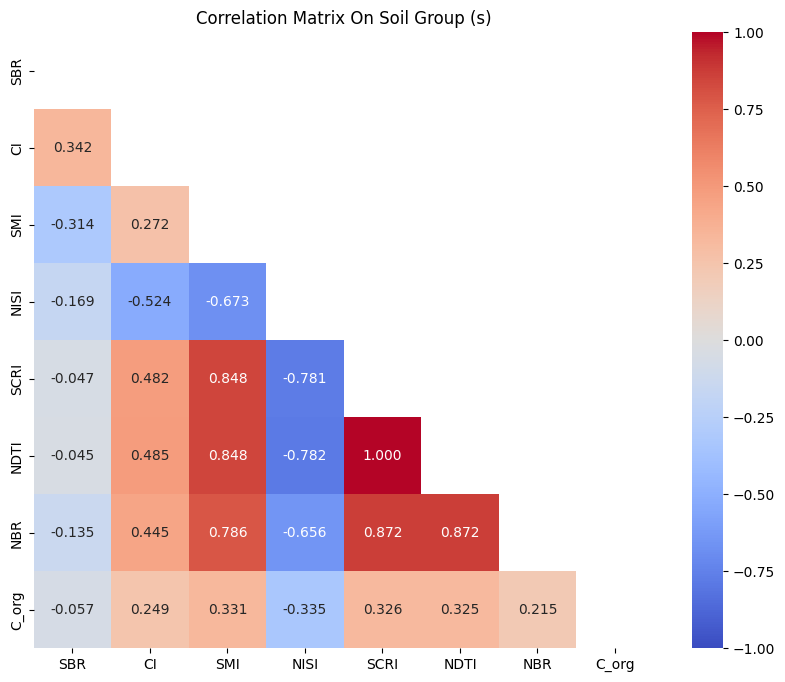

In [ ]:
#Correlation Matrix on Soil
mask = np.triu(np.ones_like(soil.corr()))
plt.figure(figsize=(10, 8))
sns.heatmap(soil.corr(), annot=True, fmt=".3f", cmap='coolwarm', vmin=-1, vmax=1,
            mask=mask)
plt.title('Correlation Matrix On Soil Group (s)')
plt.show()

In [ ]:
df = pd.DataFrame(soil)
corr_results ={}
for column in df.columns:
    if column != 'C_org':
        corr, p_value = stats.pearsonr(df[column], df['C_org'])
        corr_results[column] = {'Correlation': corr, 'p_value': p_value}

In [ ]:
for feature, values in corr_results.items():
    print(f"Correlation between C_org and: {feature}: {values['Correlation']}")
    print(f"p_value: {values['p_value']}")
    print("Significant" if values['p_value'] < 0.05 else "Not Significant")
    print()

Correlation between C_org and: SBR: -0.056904945467000784
p_value: 0.5169233867919666
Not Significant

Correlation between C_org and: CI: 0.2489050844499048
p_value: 0.004002818367401509
Significant

Correlation between C_org and: SMI: 0.33056443320187323
p_value: 0.00010830965214079003
Significant

Correlation between C_org and: NISI: -0.33496352591587514
p_value: 8.641820588317428e-05
Significant

Correlation between C_org and: SCRI: 0.3255017657021514
p_value: 0.00013986213286961457
Significant

Correlation between C_org and: NDTI: 0.32488450248077394
p_value: 0.00014424658721612975
Significant

Correlation between C_org and: NBR: 0.2154815950974383
p_value: 0.013087813550073662
Significant



In [ ]:
print(soil.corr().round(3))

         SBR     CI    SMI   NISI   SCRI   NDTI    NBR  C_org
SBR    1.000  0.342 -0.314 -0.169 -0.047 -0.045 -0.135 -0.057
CI     0.342  1.000  0.272 -0.524  0.482  0.485  0.445  0.249
SMI   -0.314  0.272  1.000 -0.673  0.848  0.848  0.786  0.331
NISI  -0.169 -0.524 -0.673  1.000 -0.781 -0.782 -0.656 -0.335
SCRI  -0.047  0.482  0.848 -0.781  1.000  1.000  0.872  0.326
NDTI  -0.045  0.485  0.848 -0.782  1.000  1.000  0.872  0.325
NBR   -0.135  0.445  0.786 -0.656  0.872  0.872  1.000  0.215
C_org -0.057  0.249  0.331 -0.335  0.326  0.325  0.215  1.000




---

Soil Ranked :

1.   NISI (-0.335)
2.   SMI (0.331)
3.   SCRI (0.326)
4.   NDTI (0.308)
5.   CI (0.249)
6.   NBR (0.185)
7.   SBR (-0.057)



---



#### PARENT MATERIAL (p)

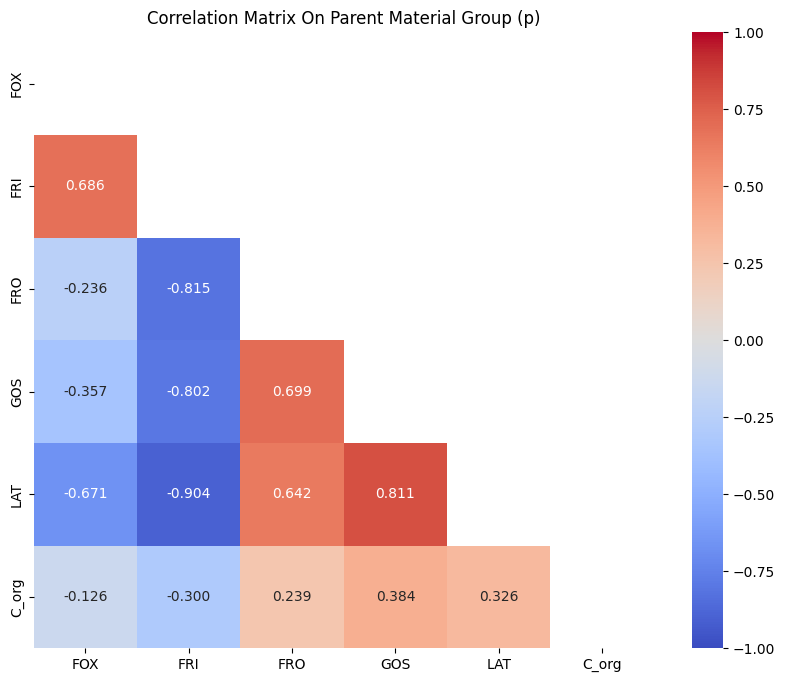

In [ ]:
#Correlation Matrix on Soil
mask = np.triu(np.ones_like(parent.corr()))
plt.figure(figsize=(10, 8))
sns.heatmap(parent.corr(), annot=True, fmt=".3f", cmap='coolwarm', vmin=-1, vmax=1,
            mask=mask)
plt.title('Correlation Matrix On Parent Material Group (p)')
plt.show()

In [ ]:
df = pd.DataFrame(parent)
corr_results ={}
for column in df.columns:
    if column != 'C_org':
        corr, p_value = stats.pearsonr(df[column], df['C_org'])
        corr_results[column] = {'Correlation': corr, 'p_value': p_value}

In [ ]:
for feature, values in corr_results.items():
    print(f"Correlation between C_org and: {feature}: {values['Correlation']}")
    print(f"p_value: {values['p_value']}")
    print("Significant" if values['p_value'] < 0.05 else "Not Significant")
    print()

Correlation between C_org and: FOX: -0.12599921695196686
p_value: 0.14998169361673594
Not Significant

Correlation between C_org and: FRI: -0.2996530157814251
p_value: 0.0004819895094318693
Significant

Correlation between C_org and: FRO: 0.23886188556191798
p_value: 0.005811058399090068
Significant

Correlation between C_org and: GOS: 0.38364222014197363
p_value: 5.604622397949772e-06
Significant

Correlation between C_org and: LAT: 0.3255017657021514
p_value: 0.00013986213286961457
Significant



In [ ]:
print(parent.corr().round(3))

         FOX    FRI    FRO    GOS    LAT  C_org
FOX    1.000  0.686 -0.236 -0.357 -0.671 -0.126
FRI    0.686  1.000 -0.815 -0.802 -0.904 -0.300
FRO   -0.236 -0.815  1.000  0.699  0.642  0.239
GOS   -0.357 -0.802  0.699  1.000  0.811  0.384
LAT   -0.671 -0.904  0.642  0.811  1.000  0.326
C_org -0.126 -0.300  0.239  0.384  0.326  1.000




---

Parent Material Ranked :

1.  GOS (0.384)
2.  LAT (0.326)
3.  FRI (-0.300)
4.  FRO (0.239)
5.  FOX (-0.126)


---



### Mutual Information

#### SOIL (s)

In [ ]:
x = soil_clean.iloc[:,0:7]
y = soil_clean.iloc[:,-1]

In [ ]:
selector = SelectKBest(score_func=mutual_info_regression, k=1) # k = 1 variable
x_selected = selector.fit_transform(x, y)

In [ ]:
selected_indices = selector.get_support(indices=True)
selected_features = [x.columns[i] for i in selected_indices]
print("Variabel Terpilih:", selected_features)

Variabel Terpilih: ['SBR']


In [ ]:
# Ensure correct shuffling and alignment
n_permutations = 1000
mi_permutations = []

for _ in range(n_permutations):
    y_shuffled = shuffle(y, random_state=_).reset_index(drop=True)  # Shuffle y
    mi_perm = mutual_info_regression(x, y_shuffled)[0]  # Remove `discrete_features`
    mi_permutations.append(mi_perm)

mi_permutations = np.array(mi_permutations)
print("Permutation test completed successfully.")

Permutation test completed successfully.


In [ ]:
# Extract observed mutual information for all features
observed_mis = selector.scores_

# Convert permutation results to a NumPy array
mi_permutations = np.array(mi_permutations)

# Calculate p-values for all features
p_values = [
    np.mean(mi_permutations >= observed_mi) for observed_mi in observed_mis
]

# Display results
for i, (feature, mi, p_val) in enumerate(zip(x.columns, observed_mis, p_values)):
    print(f"Feature: {feature}, MI: {mi:.4f}, P-value: {p_val:.4f}")


Feature: SBR, MI: 0.0921, P-value: 0.0590
Feature: CI, MI: 0.0418, P-value: 0.2290
Feature: SMI, MI: 0.0348, P-value: 0.2740
Feature: NISI, MI: 0.0856, P-value: 0.0800
Feature: SCRI, MI: 0.0000, P-value: 1.0000
Feature: NDTI, MI: 0.0074, P-value: 0.4360
Feature: NBR, MI: 0.0775, P-value: 0.1020


In [ ]:
#MI Scores on all Soil Variable
selector = SelectKBest(score_func=mutual_info_regression, k='all')
selector.fit(x, y)

SelectKBest(k='all',
            score_func=<function mutual_info_regression at 0x780c100ea7a0>)

In [ ]:
mi_scores = selector.scores_
feature_names = x.columns
mi_scores_df = pd.DataFrame({'Feature': feature_names, 'Mutual Information Score':
                             mi_scores})

print(mi_scores_df)

  Feature  Mutual Information Score
0     SBR                  0.093592
1      CI                  0.038162
2     SMI                  0.036489
3    NISI                  0.085963
4    SCRI                  0.000000
5    NDTI                  0.007513
6     NBR                  0.077260


<ipython-input-82-22bdf72c75da>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.barplot(x=x, y=y, orient='h', palette=colors, width=0.7)


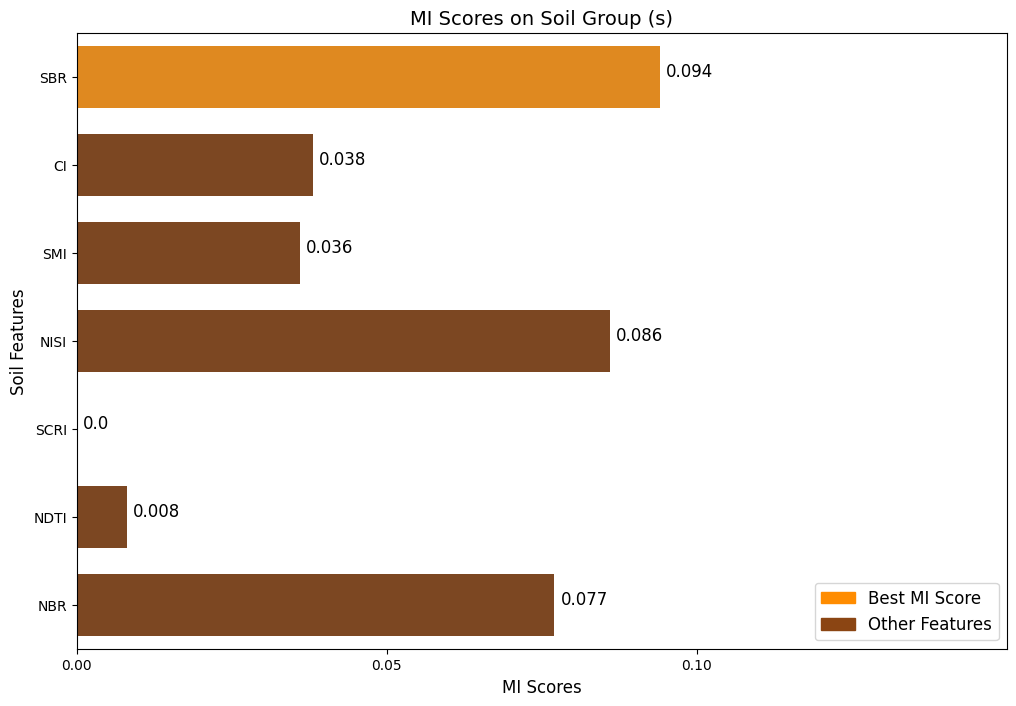

In [ ]:
best_index = mi_scores_df['Mutual Information Score'].idxmax()
colors = ['saddlebrown' if i != best_index else 'darkorange' for i in range(len(mi_scores_df))]
x = mi_scores_df['Mutual Information Score'].round(3)
y = mi_scores_df['Feature']

plt.figure(figsize=(12, 8))
plot = sns.barplot(x=x, y=y, orient='h', palette=colors, width=0.7)
for i in range(len(x)):
    plot.text(x[i] + 0.001, i, round(x[i], 3), color='black', ha='left', fontsize=12)
plt.xlim([0, 0.15])
xticks = np.arange(0, 0.15, 0.05)
plt.xticks(xticks)
plt.xlabel('MI Scores', fontsize=12)
plt.ylabel('Soil Features', fontsize=12)
plt.title('MI Scores on Soil Group (s)', fontsize=14)
best_patch = Patch(color='darkorange', label='Best MI Score')
other_patch = Patch(color='saddlebrown', label='Other Features')
plt.legend(handles=[best_patch, other_patch], loc='lower right', fontsize=12)

plt.show()

#### PARENT MATERIAL (p)


In [ ]:
x = parent_clean.iloc[:,0:5]
y = parent_clean.iloc[:,-1]

In [ ]:
selector = SelectKBest(score_func=mutual_info_regression, k=1) # k = 1 variable
x_selected = selector.fit_transform(x, y)

In [ ]:
selected_indices = selector.get_support(indices=True)
selected_features = [x.columns[i] for i in selected_indices]
print("Variabel Terpilih:", selected_features)

Variabel Terpilih: ['FOX']


In [ ]:
# Ensure correct shuffling and alignment
n_permutations = 1000
mi_permutations = []

for _ in range(n_permutations):
    y_shuffled = shuffle(y, random_state=_).reset_index(drop=True)  # Shuffle y
    mi_perm = mutual_info_regression(x, y_shuffled)[0]  # Remove `discrete_features`
    mi_permutations.append(mi_perm)

mi_permutations = np.array(mi_permutations)
print("Permutation test completed successfully.")

Permutation test completed successfully.


In [ ]:
# Extract observed mutual information for all features
observed_mis = selector.scores_

# Convert permutation results to a NumPy array
mi_permutations = np.array(mi_permutations)

# Calculate p-values for all features
p_values = [
    np.mean(mi_permutations >= observed_mi) for observed_mi in observed_mis
]

# Display results
for i, (feature, mi, p_val) in enumerate(zip(x.columns, observed_mis, p_values)):
    print(f"Feature: {feature}, MI: {mi:.4f}, P-value: {p_val:.4f}")


Feature: FOX, MI: 0.1587, P-value: 0.0030
Feature: FRI, MI: 0.0000, P-value: 1.0000
Feature: FRO, MI: 0.0085, P-value: 0.4370
Feature: GOS, MI: 0.0827, P-value: 0.0890
Feature: LAT, MI: 0.0000, P-value: 1.0000


In [ ]:
mi_scores = selector.scores_
feature_names = x.columns
mi_scores_df = pd.DataFrame({'Feature': feature_names, 'Mutual Information Score':
                             mi_scores})

print(mi_scores_df)

  Feature  Mutual Information Score
0     FOX                  0.159257
1     FRI                  0.000000
2     FRO                  0.007339
3     GOS                  0.085763
4     LAT                  0.000000


<ipython-input-152-f578b7fbe0aa>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.barplot(x=x, y=y, orient='h', palette=colors, width=0.7)


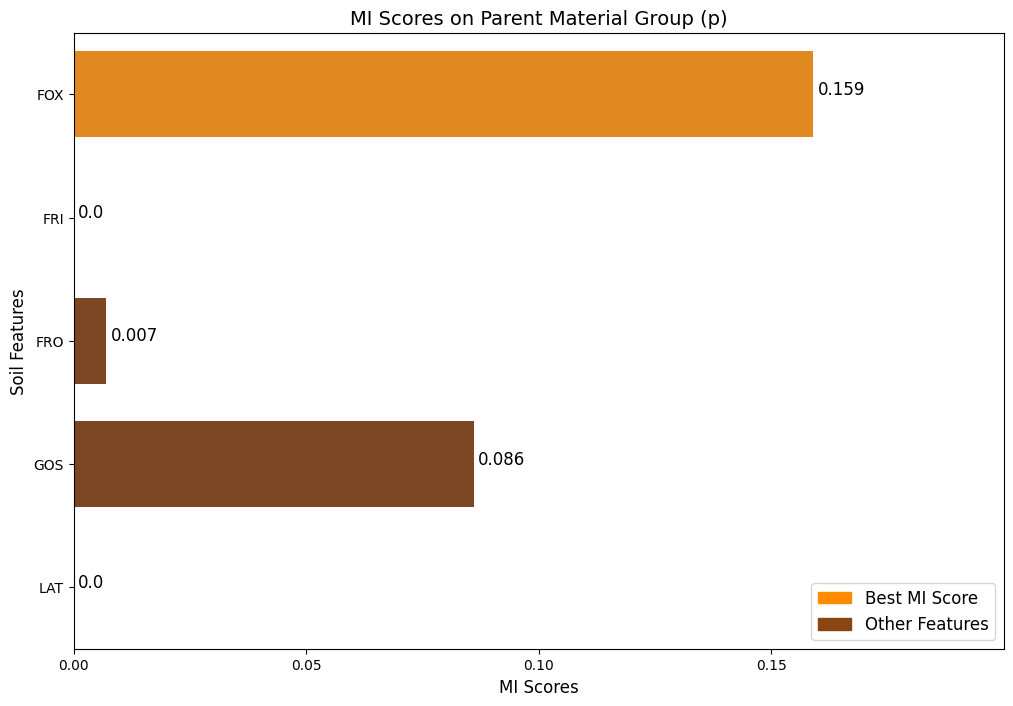

In [ ]:
best_index = mi_scores_df['Mutual Information Score'].idxmax()
colors = ['saddlebrown' if i != best_index else 'darkorange' for i in range(len(mi_scores_df))]
x = mi_scores_df['Mutual Information Score'].round(3)
y = mi_scores_df['Feature']

plt.figure(figsize=(12, 8))
plot = sns.barplot(x=x, y=y, orient='h', palette=colors, width=0.7)
for i in range(len(x)):
    plot.text(x[i] + 0.001, i, round(x[i], 3), color='black', ha='left', fontsize=12)
plt.xlim([0, 0.2])
xticks = np.arange(0, 0.2, 0.05)
plt.xticks(xticks)
plt.xlabel('MI Scores', fontsize=12)
plt.ylabel('Soil Features', fontsize=12)
plt.title('MI Scores on Parent Material Group (p)', fontsize=14)
best_patch = Patch(color='darkorange', label='Best MI Score')
other_patch = Patch(color='saddlebrown', label='Other Features')
plt.legend(handles=[best_patch, other_patch], loc='lower right', fontsize=12)

plt.show()

### Recrusive Feature Elimination

#### SOIL (s)

##### Linear Regression

In [ ]:
soil_scaled

,SBR,CI,SMI,NISI,SCRI,NDTI,NBR,C_org
0,-0.937345,-0.608600,1.623463,-0.091344,0.396477,0.410439,0.160023,8.95
1,0.054264,-2.389504,1.378444,-0.041459,-0.009134,0.000357,-0.003594,1.61
2,1.209870,-0.235278,-0.983708,0.621303,-1.071199,-1.082781,-0.933469,2.83
3,-1.888150,-1.385331,1.941700,-0.349052,0.482062,0.496026,0.016407,4.11
4,2.132058,0.884445,0.098609,-0.313381,-0.020484,-0.011199,0.313445,5.35
...,...,...,...,...,...,...,...,...
127,0.194424,1.403658,0.433496,0.058064,0.798741,0.809309,0.068090,2.30
128,0.751185,0.127673,1.190387,-1.396924,1.092570,1.094762,0.623986,4.49
129,-0.237467,-0.252580,1.397645,-0.295747,0.923896,0.931541,0.896135,4.08
130,0.244408,0.641496,0.721691,-0.331146,0.679564,0.692066,0.583516,3.53


In [ ]:
x = soil_scaled.iloc[:,0:7]
y = soil_scaled.iloc[:,-1]

In [ ]:
lr = LinearRegression()

In [ ]:
rfe = RFE(estimator=lr, n_features_to_select=1)

In [ ]:
rfe.fit(x, y)

RFE(estimator=LinearRegression(), n_features_to_select=1)

In [ ]:
#Soil Feature Rank
for i in range(x.shape[1]):
    print(f'Feature: {x.columns[i]}, Selected: {rfe.support_[i]}, Rank: {rfe.ranking_[i]:.1f}')

Feature: SBR, Selected: False, Rank: 7.0
Feature: CI, Selected: False, Rank: 5.0
Feature: SMI, Selected: False, Rank: 4.0
Feature: NISI, Selected: False, Rank: 6.0
Feature: SCRI, Selected: True, Rank: 1.0
Feature: NDTI, Selected: False, Rank: 2.0
Feature: NBR, Selected: False, Rank: 3.0


In [ ]:
# R2 Score to measure all soil features tested on rfe
for feature in x.columns:
    lr.fit(x, y)
    y_pred = lr.predict(x)
    r_squared = r2_score(y, y_pred)
    print(f"R-squared score for '{feature}': {r_squared:.4f}")

R-squared score for 'SBR': 0.1883
R-squared score for 'CI': 0.1883
R-squared score for 'SMI': 0.1883
R-squared score for 'NISI': 0.1883
R-squared score for 'SCRI': 0.1883
R-squared score for 'NDTI': 0.1883
R-squared score for 'NBR': 0.1883


In [ ]:
importances = lr.coef_
feature_order = ['CI', 'SMI', 'NDTI', 'SCRI', 'NISI', 'NBR', 'SBR']
feature_importance_df = pd.DataFrame({
    'Feature': x.columns,
    'Importance': importances
})
feature_importance_df = feature_importance_df.set_index('Feature').loc[feature_order].reset_index()

print(feature_importance_df)

Feature: 0, Score: -0.22776
Feature: 1, Score: 0.52477
Feature: 2, Score: 0.63489
Feature: 3, Score: -0.34511
Feature: 4, Score: 17.86680
Feature: 5, Score: -17.44405
Feature: 6, Score: -0.85729
  Feature  Importance
0      CI    0.524766
1     SMI    0.634885
2    NDTI  -17.444046
3    SCRI   17.866801
4    NISI   -0.345106
5     NBR   -0.857292
6     SBR   -0.227761


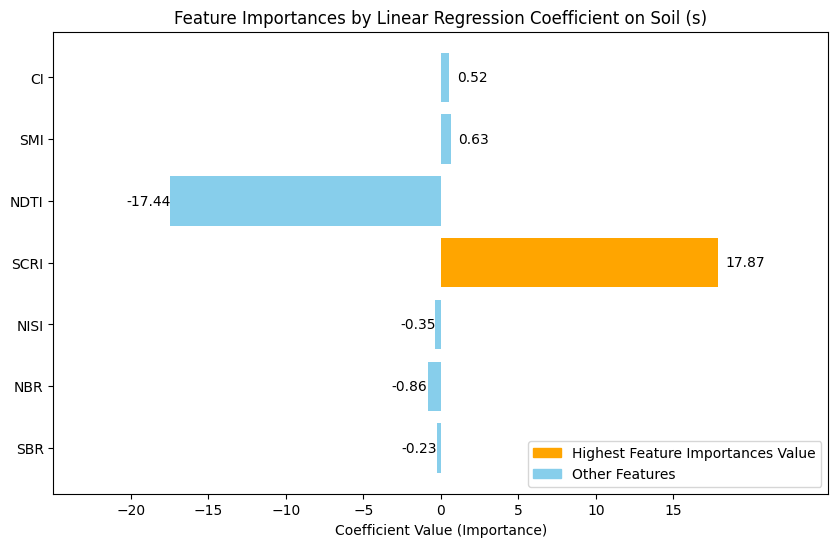

In [ ]:
from matplotlib.patches import Patch
plt.figure(figsize=(10, 6))
best_index = np.argmax(np.abs(feature_importance_df['Importance']))
colors = ['skyblue' if i != best_index else 'orange' for i in range(len(feature_importance_df))]
bars = plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color=colors)
plt.xlim([-25, 25])
xticks = np.arange(-20, 20, 5)
plt.xticks(xticks)
plt.xlabel('Coefficient Value (Importance)')
plt.title('Feature Importances by Linear Regression Coefficient on Soil (s)')
plt.gca().invert_yaxis()
best_patch = Patch(color='orange', label='Highest Feature Importances Value')
other_patch = Patch(color='skyblue', label='Other Features')
plt.legend(handles=[best_patch, other_patch], loc='lower right')
for bar in bars:
    width = bar.get_width()
    plt.text(width if width < 0 else width + 0.5,    # Adjust positioning for positive/negative values
             bar.get_y() + bar.get_height() / 2,     # Center the text vertically
             f'{width:.2f}',                         # Format the value with 2 decimal places
             va='center', ha='left' if width > 0 else 'right')  # Adjust horizontal alignment based on bar direction


plt.show()

##### Random Forest

In [ ]:
soil_clean = data_clean[['SBR','CI','SMI','NISI','SCRI','NDTI','NBR','C_org']]

In [ ]:
x = soil_clean.iloc[:,0:7]
y = soil_clean.iloc[:,-1]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30,
                                                    random_state=42)

In [ ]:
rf = RandomForestRegressor(random_state = 42)

In [ ]:
rfe = RFE(estimator=rf, n_features_to_select=1)

In [ ]:
rfe.fit(x, y)

RFE(estimator=RandomForestRegressor(random_state=42), n_features_to_select=1)

In [ ]:
for i in range(x.shape[1]):
    print(f'Feature: {x.columns[i]}, Selected: {rfe.support_[i]}, Rank: {rfe.ranking_[i]:.1f}')

Feature: SBR, Selected: False, Rank: 4.0
Feature: CI, Selected: False, Rank: 3.0
Feature: SMI, Selected: False, Rank: 2.0
Feature: NISI, Selected: True, Rank: 1.0
Feature: SCRI, Selected: False, Rank: 7.0
Feature: NDTI, Selected: False, Rank: 5.0
Feature: NBR, Selected: False, Rank: 6.0


In [ ]:
# R2 Score to measure all soil features tested on rfe
for feature in x.columns:
    rf.fit(x, y)
    y_pred = rf.predict(x)
    r_squared = r2_score(y, y_pred)
    print(f"R-squared score for '{feature}': {r_squared:.4f}")

R-squared score for 'SBR': 0.8733
R-squared score for 'CI': 0.8733
R-squared score for 'SMI': 0.8733
R-squared score for 'NISI': 0.8733
R-squared score for 'SCRI': 0.8733
R-squared score for 'NDTI': 0.8733
R-squared score for 'NBR': 0.8733


In [ ]:
# Get importance from RandomForestRegressor model
importance = rf.feature_importances_

feature_names = x.columns

for i, v in enumerate(importance):
    print(f'Feature: {feature_names[i]}, Score: {v:.5f}')

feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importance
})

Feature: SBR, Score: 0.18203
Feature: CI, Score: 0.16934
Feature: SMI, Score: 0.18161
Feature: NISI, Score: 0.22113
Feature: SCRI, Score: 0.06449
Feature: NDTI, Score: 0.08184
Feature: NBR, Score: 0.09956


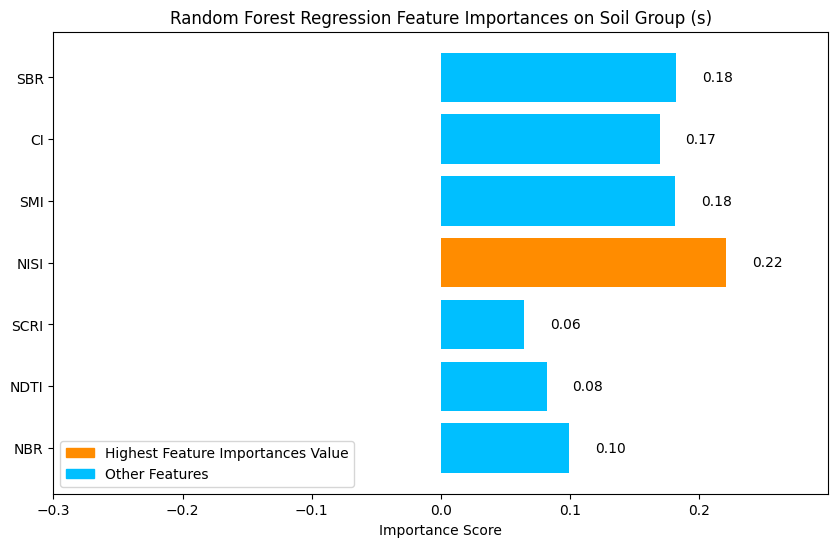

In [ ]:
plt.figure(figsize=(10, 6))
best_index = np.argmax(np.abs(feature_importance_df['Importance']))
colors = ['deepskyblue' if i != best_index else 'darkorange' for i in range(len(feature_importance_df))]
bars = plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color=colors)
plt.xlim([-0.3, 0.3])
xticks = np.arange(-0.3, 0.3, 0.1)
plt.xticks(xticks)
plt.xlabel('Importance Score')
plt.title('Random Forest Regression Feature Importances on Soil Group (s)')
plt.gca().invert_yaxis()
best_patch = Patch(color='darkorange', label='Highest Feature Importances Value')
other_patch = Patch(color='deepskyblue', label='Other Features')
plt.legend(handles=[best_patch, other_patch], loc='lower left')
for bar in bars:
    width = bar.get_width()
    plt.text(width + (0.02 if width > 0 else -0.02),    # Adjust positioning for positive/negative values
             bar.get_y() + bar.get_height() / 2,        # Center the text vertically
             f'{width:.2f}',                            # Format the value with 2 decimal places
             va='center', ha='left' if width > 0 else 'right')  # Adjust horizontal alignment

plt.show()

#### PARENT MATERIAL (p)

##### Linear Regression

In [ ]:
x = parent_scaled.iloc[:,0:5]
y = parent_scaled.iloc[:,-1]

In [ ]:
rfe = RFE(estimator=lr, n_features_to_select=1)

In [ ]:
rfe.fit(x, y)

RFE(estimator=LinearRegression(), n_features_to_select=1)

In [ ]:
#Parent Material Feature Rank
for i in range(x.shape[1]):
    print(f'Feature: {x.columns[i]}, Selected: {rfe.support_[i]}, Rank: {rfe.ranking_[i]:.1f}')

Feature: FOX, Selected: False, Rank: 4.0
Feature: FRI, Selected: False, Rank: 3.0
Feature: FRO, Selected: False, Rank: 2.0
Feature: GOS, Selected: True, Rank: 1.0
Feature: LAT, Selected: False, Rank: 5.0


In [ ]:
# R2 Score to measure all soil features tested on rfe
for feature in x.columns:
    lr.fit(x[[feature]], y)
    y_pred = lr.predict(x[[feature]])
    r_squared = r2_score(y, y_pred)
    print(f"R-squared score for '{feature}': {r_squared:.4f}")

R-squared score for 'FOX': 0.0159
R-squared score for 'FRI': 0.0898
R-squared score for 'FRO': 0.0571
R-squared score for 'GOS': 0.1472
R-squared score for 'LAT': 0.1060


In [ ]:
importances = lr.coef_
feature_order = ['GOS','FOX','LAT','FRI','FRO']
feature_importance_df = pd.DataFrame({
    'Feature': x.columns,
    'Importance': importances.round(3)
})
feature_importance_df = feature_importance_df.set_index('Feature').loc[feature_order].reset_index()

print(feature_importance_df)

  Feature  Importance
0     GOS       0.733
1     FOX       0.343
2     LAT       0.232
3     FRI      -0.451
4     FRO      -0.399


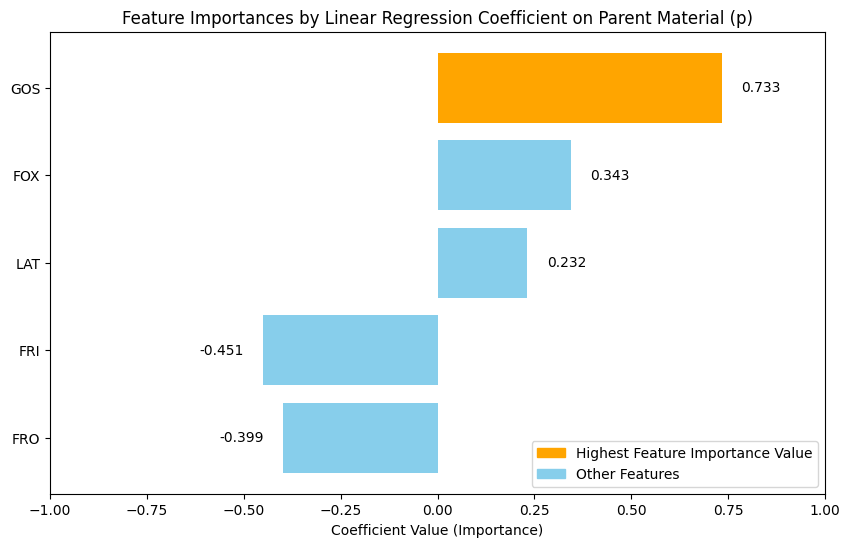

In [ ]:
plt.figure(figsize=(10, 6))
best_index = np.argmax(np.abs(feature_importance_df['Importance']))
colors = ['skyblue' if i != best_index else 'orange' for i in range(len(feature_importance_df))]
bars = plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color=colors)
plt.xlim([-1, 1])
xticks = np.arange(-1, 1.25, 0.25)
plt.xticks(xticks)
plt.xlabel('Coefficient Value (Importance)')
plt.title('Feature Importances by Linear Regression Coefficient on Parent Material (p)')
plt.gca().invert_yaxis()
best_patch = Patch(color='orange', label='Highest Feature Importance Value')
other_patch = Patch(color='skyblue', label='Other Features')
plt.legend(handles=[best_patch, other_patch], loc='lower right')

for bar in bars:
    width = bar.get_width()  # Get the width of the bar (importance value)
    plt.text(width + (0.05 if width > 0 else -0.05),  # Offset for positive/negative values
             bar.get_y() + bar.get_height() / 2,       # Position text at the middle of the bar
             f'{width:.3f}',                           # Format the value with 3 decimal places
             va='center', ha='left' if width > 0 else 'right')  # Adjust text alignment

plt.show()

##### Random Forest

In [ ]:
parent_clean = data_clean[['FOX','FRI','FRO','GOS','LAT','C_org']]

In [ ]:
x = parent_clean.iloc[:,0:5]
y = parent_clean.iloc[:,-1]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30,
                                                    random_state=42)

In [ ]:
rfe = RFE(estimator=rf, n_features_to_select=1)

In [ ]:
rfe.fit(x, y)

RFE(estimator=RandomForestRegressor(random_state=42), n_features_to_select=1)

In [ ]:
for i in range(x.shape[1]):
    print(f'Feature: {x.columns[i]}, Selected: {rfe.support_[i]}, Rank: {rfe.ranking_[i]:.1f}')

Feature: FOX, Selected: False, Rank: 3.0
Feature: FRI, Selected: False, Rank: 5.0
Feature: FRO, Selected: False, Rank: 4.0
Feature: GOS, Selected: True, Rank: 1.0
Feature: LAT, Selected: False, Rank: 2.0


In [ ]:
# R2 Score to measure all soil features tested on rfe
for feature in x.columns:
    rf.fit(x[[feature]], y)
    y_pred = rf.predict(x[[feature]])
    r_squared = r2_score(y, y_pred)
    print(f"R-squared score for '{feature}': {r_squared:.4f}")

R-squared score for 'FOX': 0.8421
R-squared score for 'FRI': 0.8421
R-squared score for 'FRO': 0.8421
R-squared score for 'GOS': 0.8421
R-squared score for 'LAT': 0.8421


In [ ]:
importance = rf.feature_importances_

feature_names = x.columns

for i, v in enumerate(importance):
    print(f'Feature: {feature_names[i]}, Score: {v:.5f}')

Feature: FOX, Score: 0.18213
Feature: FRI, Score: 0.12495
Feature: FRO, Score: 0.13298
Feature: GOS, Score: 0.34792
Feature: LAT, Score: 0.21202


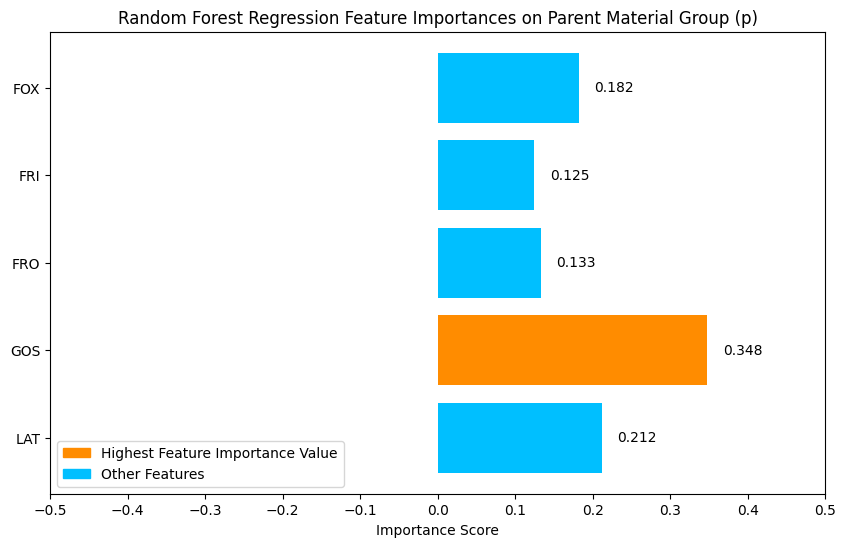

In [ ]:
plt.figure(figsize=(10, 6))
best_index = np.argmax(importance)
colors = ['deepskyblue' if i != best_index else 'darkorange' for i in range(len(importance))]
bars = plt.barh(feature_names, importance, color=colors)
plt.xlim([-0.5, 0.5])
xticks = np.arange(-0.5, 0.6, 0.1)
plt.xticks(xticks)
plt.xlabel('Importance Score')
plt.title('Random Forest Regression Feature Importances on Parent Material Group (p)')
plt.gca().invert_yaxis()
best_patch = Patch(color='darkorange', label='Highest Feature Importance Value')
other_patch = Patch(color='deepskyblue', label='Other Features')
plt.legend(handles=[best_patch, other_patch], loc='lower left')

for bar in bars:
    width = bar.get_width()  # Get the width of each bar (the importance value)
    plt.text(width + (0.02 if width > 0 else -0.02),  # Adjust text position for positive/negative values
             bar.get_y() + bar.get_height() / 2,       # Center the text vertically on the bar
             f'{width:.3f}',                           # Format the text to 3 decimal places
             va='center', ha='left' if width > 0 else 'right')  # Align text based on direction of bar

plt.show()

# Scatter Plot

## Soil (s)

In [ ]:
import seaborn as sns

In [ ]:
x = data_clean[['NISI']].values
y = data_clean[['C_org']].values

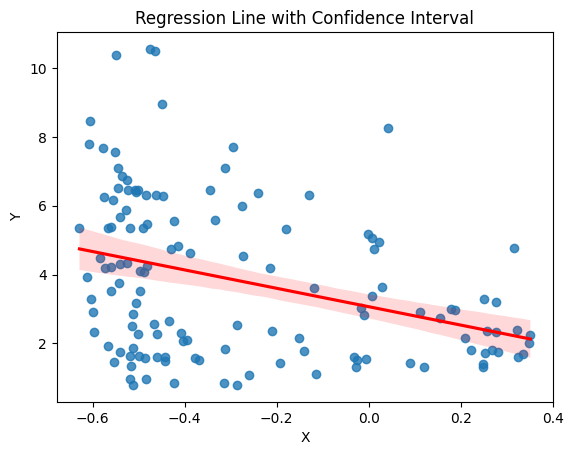

In [ ]:
sns.regplot(x=x, y=y, ci=95, line_kws={"color": "red"})  # 'ci' controls confidence interval (default is 95)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Regression Line with Confidence Interval')
plt.show()

In [ ]:
x = data_clean[['SBR']].sample(66).values
y = data_clean[['C_org']].sample(66).values

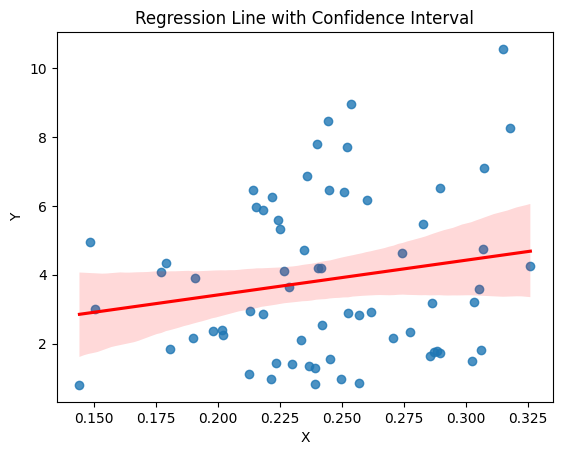

In [ ]:
sns.regplot(x=x, y=y, ci=95, line_kws={"color": "red"})  # 'ci' controls confidence interval (default is 95)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Regression Line with Confidence Interval')
plt.show()

In [ ]:
x = data_clean[['SCRI']].values
y = data_clean[['C_org']].values

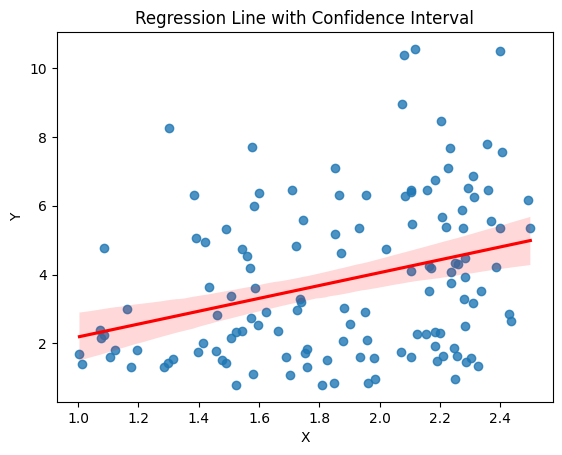

In [ ]:
sns.regplot(x=x, y=y, ci=95, line_kws={"color": "red"})  # 'ci' controls confidence interval (default is 95)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Regression Line with Confidence Interval')
plt.show()